# One sample T-test

**Goal:** see if the mean of a gievn population differs from a given number.

## Example 1: High of the girls from Santos

We know that the average high of Brazilian women is 1.60. There was a pool with women from Santos to see if their high is the same of the country or if its different.
<br><br>
H1: mean_santos_women != mean_brazilian_women <br>
H0: mean_santos_women == mean_brazilian_women<br>
<br><br>
**Assumptions:** <br>
1 The dependent variable is continuous<br>
2 Observations are independent of each other (e.g., all women are unrelated)<br>
3 The dependent variable has a continuous distribution<br>
4 The dependent variable has no significant outliers<br>

In [16]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [14]:
# Creating my pool:

random.seed(20) 

santos_pool = [random.randint(149, 187) for x in range(50)] 

Text(0.5, 1.0, 'High Santos in cm')

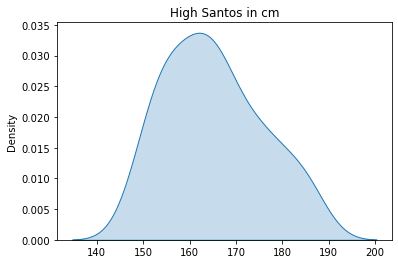

In [17]:
# Now let's take a look of the distribution of the highs in Santos

sns.kdeplot(santos_pool, shade=True)
plt.title("High Santos in cm")

In [18]:
# Now let's run the test:

#hypothesized population mean
popmean = 160  

#teste:
tStat, pValue =  scipy.stats.ttest_1samp(santos_pool, popmean, axis=0)

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0009635749523333777 T-Statistic:3.512820543736554


Our p-value is higher than 0.05, therefore we do not reject the null hypothesis, meaning that we cannot say that, on average, woman from Santos are taller ten the brazilian mean

## Example 2: Conservadorism among black people

This is an example from the AGRESTI and FINLAY (2012). A pool was made in the USA to see if the population was more liberal or more conservative. In a range between 1 to 7, the interviewers need to say if they were more liberal (1) or more conservative (7).<br>
We want to see if black people are statistically conservative. Therefore our hypothesis are:
<br><br>
H1: mean_black_score > 4 <br>
H0: mean_black_score ≤ 4<br>


In [23]:
# Creating the results:

psg = { 'score': [1,2,3,4,5,6,7], 
       'black' : [10, 21, 22, 74, 21, 27, 11], 
       'white' : [36, 109, 124, 421, 179, 176, 28], 
       'others' : [1, 13, 13, 27, 9, 7, 2]}

resposta =  ['1. Extremely liberal', '2. Liberal', '3. A little liberal', '4. Non liberal, nor conservative',
     '5. A little conservative', '6. Conservative', '7. Extremely conservative']

psg = pd.DataFrame(psg, index = resposta)
psg

,score,black,white,others
1. Extremely liberal,1,10,36,1
2. Liberal,2,21,109,13
3. A little liberal,3,22,124,13
"4. Non liberal, nor conservative",4,74,421,27
5. A little conservative,5,21,179,9
6. Conservative,6,27,176,7
7. Extremely conservative,7,11,28,2


In [43]:
position = 6

psg.iloc[position,0]

7

To keep with our analisys, we need to create an array containing the score of which respondent: 

In [44]:
black_respondents = []

for position in range(0,7):
    respondents = psg.iloc[position,1]
    score = psg.iloc[position,0]
    x = np.repeat(score, respondents)
    
    black_respondents.append(x)

# Creating one single array:
black_respondents = np.concatenate( black_respondents , axis=0 )
black_respondents

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [45]:
# Let's take a look at the score mean:
np.mean(black_respondents)

4.075268817204301

In [46]:
# It seems that we won't reject H0, let's make the test:

#hypothesized population mean
popmean = 4  


#teste:
tStat, pValue =  scipy.stats.ttest_1samp(black_respondents, popmean, axis=0)

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.4980407237076129 T-Statistic:0.6789141264637335


My p-value is greater than 0.05, so I do not reject the null hypothesis, which means that black respondents do not tend toward extreme political ideologies